**2.Load the dataset**

In [32]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

**3.Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


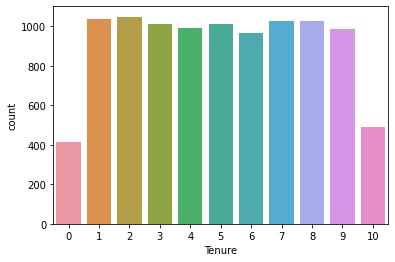

In [8]:
sns.countplot(dataset['Tenure'])
plt.show()

**Bi-Variate Analysis**

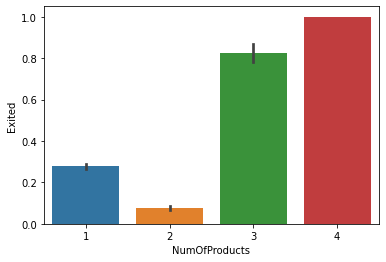

In [17]:
sns.barplot(x='NumOfProducts',y='Exited',data=dataset)

**Multi-Variate Analysis**

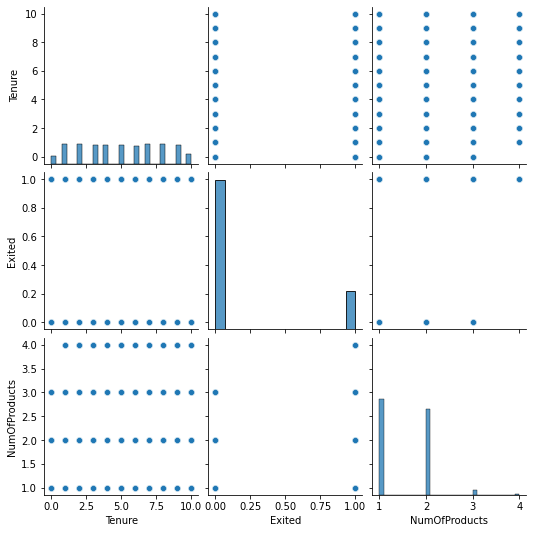

In [18]:
sns.pairplot(data=dataset[['Tenure','Exited','NumOfProducts','Geography']])

**4.Perform descriptive statistics on the dataset**

In [19]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**5.Handle the Missing values**

In [20]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**6.Find the outliers and replace the outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


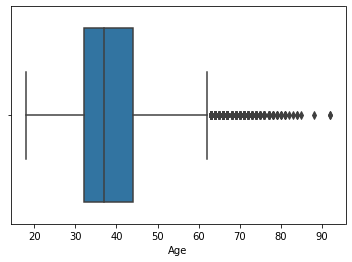

In [29]:
sns.boxplot(dataset['Age'],data=dataset)

In [30]:
Q1=dataset['Age'].quantile(0.25)
Q3=dataset['Age'].quantile(0.75)
IQR=Q3-Q1
IQR

12.0

In [34]:
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
dataset['Age']=np.where(dataset['Age']>upper_whisker,upper_whisker,np.where(dataset['Age']<lower_whisker,lower_whisker,dataset['Age']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


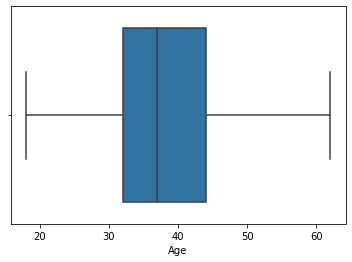

In [35]:
sns.boxplot(dataset['Age'],data=dataset)

**7.Check for Categorical columns and perform encoding.**

In [36]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder
dataset['Gender'] = LabelEncoder().fit_transform(dataset['Gender'])
dataset['Geography'] = LabelEncoder().fit_transform(dataset['Geography'])

In [47]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int64
Gender               int64
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**8.Split the data into dependent and independent variables**

In [49]:
x=dataset[['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y=dataset[['Exited']]

**9.Scale the independent variables**

In [50]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scale.fit_transform(x)

array([[-0.78321342, -0.32622142, -0.90188624, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.60653412, -0.44003595,  1.51506738, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-0.99588476, -1.53679418, -0.90188624, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-1.47928179,  0.60498839, -0.90188624, ..., -1.54776799,
         0.97024255, -1.00864308],
       [-0.11935577,  1.25683526,  0.30659057, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-0.87055909,  1.46377078, -0.90188624, ...,  0.64609167,
        -1.03067011, -1.07636976]])

**10.Split the data into training and testing**

In [55]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [56]:
x_train.shape

(7500, 11)

In [57]:
x_test.shape

(2500, 11)

In [58]:
y_train.shape

(7500, 1)

In [59]:
y_test.shape

(2500, 1)